In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import neurofinder
import numpy as np
from regional import many
from skimage import measure

def mask_to_regional(m):
    '''Convert a mask to a regional many object so it can be measured
    using the neurofinder library.'''
    mlbl = measure.label(m)
    coords = []
    for lbl in range(1, np.max(mlbl) + 1):
        yy, xx = np.where(mlbl == lbl)
        coords.append([[y, x] for y, x in zip(yy, xx)])
    return many(coords)

m2r = mask_to_regional

print('Done')

Done


[0, nan]
p=1.00, r=0.50


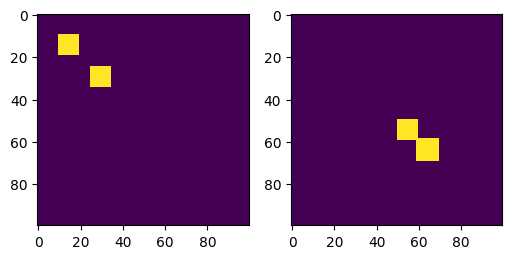

In [39]:
a = np.zeros((100,100))
a[10:20,10:20] = 1.
a[25:35,25:35] = 1.

b = np.zeros((100,100))
b[50:60,50:60] = 1.
# Swap out the following two lines.
b[59:70,59:70] = 1. # Slight overlap with other box. -> p=1.0, r=0.5
# b[61:70,61:70] = 1.   # No overlap with other box -> p=1.0, r=1.0

print(neurofinder.match(m2r(a), m2r(b)))
r, p = neurofinder.centers(m2r(a), m2r(b)) 
print('p=%.2lf, r=%.2lf' % (p, r))

fig,_ = plt.subplots(1,2)
fig.axes[0].imshow(a)
fig.axes[1].imshow(b)
plt.show()